<a href="https://colab.research.google.com/github/victorxiv/mvp1/blob/main/MVP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP do Sprint I – Análise de Dados e Boas Práticas
## Aluno: Victor Carvalho Pires
### Predição de câncer de pulmão 

**1. Definição do problema**

O presente trabalho busca prever propensos ao diagnóstico de câncer de pulmão, a partir de um simples questionário respondido pelos indivíduos. Para tanto, utilizaremos um *dataset* que contém as respostas de indivíduos para uma série de características que podem levar o paciente a sofrer do tipo de câncer em questão. É relevante ressaltar que o *dataset* no qual o estudo se ancora, está disponível na plataforma on-line Kaggle. 

Trata-se de um problema de aprendizado supervisionado de classificação, na medida em que possuímos dados rotulados que possibilitam um sistema compreender, com base nos dados disponíveis, qual combinações de respostas torna o respondente do questionário um propenso. 

Acerca da doença abordada, o câncer de pulmão é o tipo da doença que, segundo OPAS -  Organização Pan-Americana de Saúde - possui a maior incidência de casos ao redor do mundo, além de ser o que mais faz vítimas fatais.

Informações acerca dos atributos do *dataset*:

**GENDER**: gênero (M – homem, F – mulher)

**AGE**: idade 

**SMOKING**: fumante (2 – sim, 1 – não)

**YELLOW_FINGERS**: dedos amarelados (2 – sim, 1 – não)

**ANXIETY**: ansiedade (2 – sim, 1 – não)

**PEER_PRESSURE**: pressão das pessoas próximas (2 – sim, 1 – não)

**CHRONIC DISEASE**: doença crônica (2 – sim, 1 – não)

**FATIGUE**: fatiga (2 – sim, 1 – não)

**ALLERGY**: alergia (2 – sim, 1 – não)

**WHEEZING**: chiado (2 – sim, 1 – não)

**ALCOHOL CONSUMING**: consumo de álcool (2 – sim, 1 – não)

**COUGHING**: tosse (2 – sim, 1 – não)

**SHORTNESS OF BREATH**: falta de ar (2 – sim, 1 – não)

**SWALLOWING DIFFICULTY**: dificuldade de engolir(2 – sim, 1 – não)

**CHEST PAIN**: dores no peito (2 – sim, 1 – não)

**LUNG_CANCER**: câncer de pulmão (Sim – positivo, Não – Negativo)


In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

**2. Carga do *dataset*** 

Realizaremos a importação do *dataset* para, então, procedermos com a análise exploratória dos dados.


In [3]:
# Informa a url de importação do dataset
url = "https://raw.githubusercontent.com/victorxiv/mvp1/main/survey_lung_cancer.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

**3. Análise Exploratória**

```
# Isto está formatado como código
```



Com o *dataset* carregado, é hora de saber a dimensão da base de dados com a qual estamos lidando.

In [4]:
# Mostrando as dimensões do dataset
dataset.shape

(309, 16)

O dataset possui 309 linhas e 16 colunas. 

É necessário, ainda, conhecer informações gerais do dataset. 

In [5]:
# Mostrando as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

O dataset apresenta variáveis inteiras e objetos. 

A fim de visualizar a parte inicial do dataset, vamos analisar suas 10 primeiras linhas.

In [6]:
# Mostrando as primeiras linhas do dataset para análise
dataset.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


Em seguida, vamos analisar as 10 últimas linhas.

In [7]:
# Mostrando as últimas linhas do dataset para análise
dataset.tail(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


A rápida análise que os comandos anteriores proporcionaram nos mostra que o dataset trabalha com os números "2" e "1" para representar "Sim" e "Não" respectivamente. 

Com o intuito de facilitar a manipulação de dados daqui em diante, propomos uma alteração para a representação binária clássica, contendo "0" para "Não" e "1" para "Sim". 

Não sem antes antecipar um comando de pré-processamento de dados para descobrir se há missings, uma vez que poderia confundir após a mudança de representação. 

In [9]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Uma vez que não há missings, o caminho está livre para a alteração proposta, que faremos em duas pequenas etapas, verificando, após cada uma, o impacto. 

In [10]:
# Alteração para o modelo binário padrão
dataset=dataset.replace(1,0)
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,2,2,0,0,2,0,2,2,2,2,2,2,YES
1,M,74,2,0,0,0,2,2,2,0,0,0,2,2,2,YES
2,F,59,0,0,0,2,0,2,0,2,0,2,2,0,2,NO
3,M,63,2,2,2,0,0,0,0,0,2,0,0,2,2,NO
4,F,63,0,2,0,0,0,0,0,2,0,2,2,0,0,NO


In [11]:
dataset=dataset.replace(2,1)
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


Adaptação concluída! Seguiremos para a análise estatística do dataset.

**4. Análise de dados** 

In [12]:
# Resumo estatístico do dataset
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


O quadro de resumo estatístico confirma o que a análise prévia já evidenciava: as linhas que se referem aos quartis 25%, 50% e 75%, além de mínimo e máximo, não nos dizem nada relevante nesse caso. Apenas confirmam a utilização do 0 e 1 para representar as respostas. 

Algumas observações podem ser tecidas analisando as demais medidas estatísticas, média (medida de posição) e desvio padrão (medida de dispersão) 

Age: observamos que a média de idade contida no dataset é de 62,6 anos, sendo o indivíduo mais novo possui 21 e o mais velho, 87 anos; Smoking: percebemos a maior parte dos indivíduos é fumantem, pois a média é duperior à metade de 1, valor que representa afirmativo para o comportamento em questão; Yellow_fingers: a maioria dos indivpiduos possuem dedos amarelados; Anxiety: pouco menos da metade dos pesquisados sofrem de ansiedade; Peer_pressure: quase a metade do grupo sofre esse tipo de pressão; Chronic Disease: praticamente metade dos pesquisados tem doença crônica; Fatigue: mais da metade dos indivíduos apresentam fadiga; Allergy: pouco mais de 50% têm alergia; Wheezing: pouco mais da metade apresenta chiado; Alcohol consuming: o mesmo se refere ao consumo de álcool Coughing: mais da metade apresenta tosse Shortness of breath: Falta de ar é um sintoma que aparece bastante; Swollowing difficulty: menos da metade apresenta dificuldade de engolir; e Chest pain: pouco mais da metade sente dor no peito

Agora, é pertinete verificarmos a distribuições de algumas classes. 

In [13]:
dataset.groupby('GENDER').size()

GENDER
F    147
M    162
dtype: int64

In [ ]:
cores = ["#003641","#00A091","#00C9B8","#ASCD5C","#D6E266","#4C7C83"]


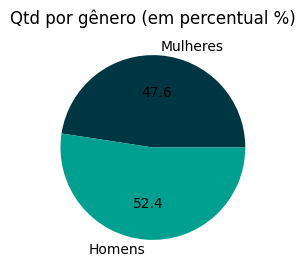

In [17]:
# Análise de gênero 
gender = ['Mulheres' , "Homens"]
qtd_gender = [147 , 162]
fig, ax = plt.subplots(figsize=(7,3))
ax.pie(qtd_gender, labels = gender, autopct="%.1f", colors=cores)
ax.set_title("Qtd por gênero (em percentual %)")
plt.show()

Observamos que dos indivíduos mapeados no dataset, 52,4% são homens e 47,6% são mulhers, o que representa uma distribuição balanceada. 

In [18]:
# Análise de resultado
dataset.groupby('LUNG_CANCER').size()

LUNG_CANCER
NO      39
YES    270
dtype: int64

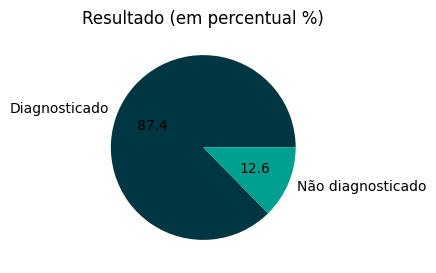

In [19]:
# Continuação
types = ["Diagnosticado" , "Não diagnosticado"]
qtd_types = [270 , 39]
fig, ax = plt.subplots(figsize=(7,3))
ax.pie(qtd_types, labels = types, autopct="%.1f", colors=cores)
ax.set_title("Resultado (em percentual %)")
plt.show()

Dos 309 indivíduos representados no dataset, 87,4% foram diagnosticados com câncer de pulmão e 12,6% não foram diagnosticados com a doença. 

Faremos agora uma análise de cada uma das variáveis inteiras, por meio de gráficos histogramas. 

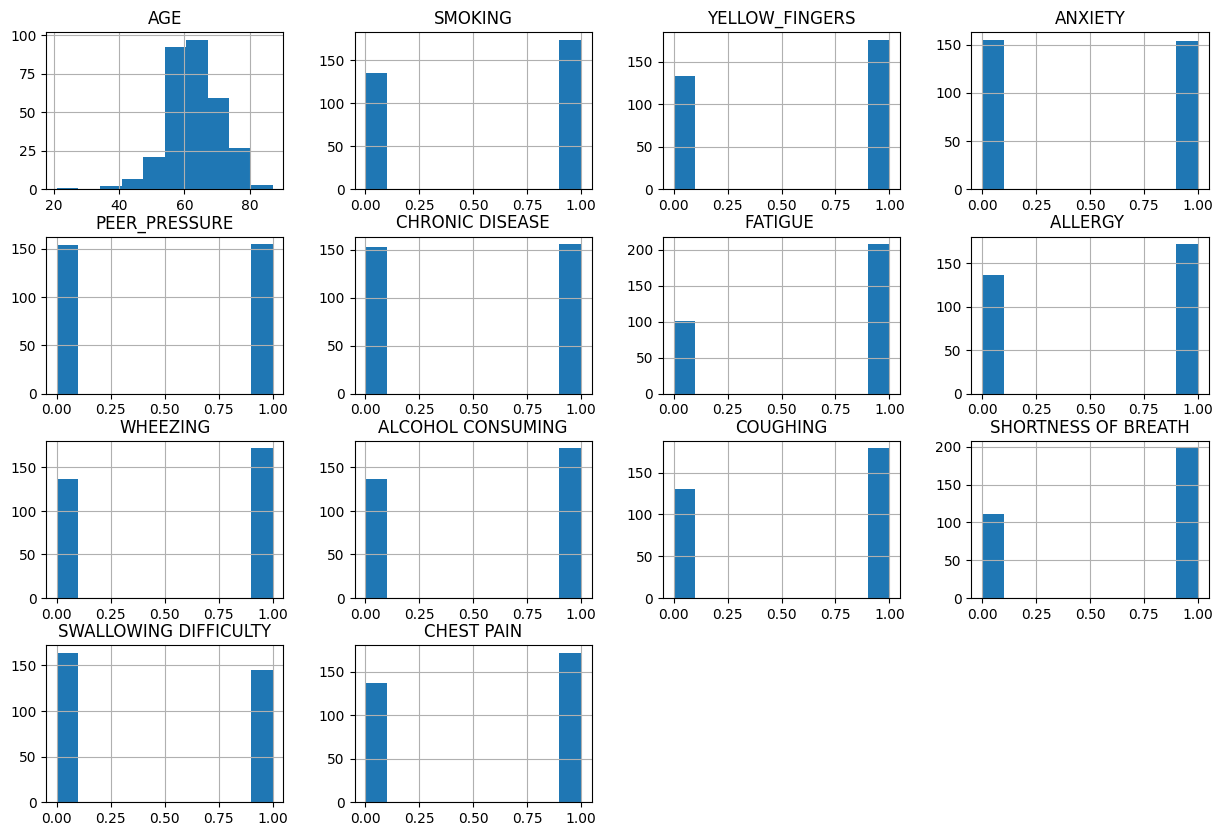

In [27]:
# Histogramas
dataset.hist(figsize = (15,10))
plt.show()

Apesar de já termos tecido algumas observações acerca dos atributos, aqui temos uma visão mais gráfica. A idade está bastante concentrada entre 55 e 65 anos aproximadadmente. Há mais fumantes que não fumantes, mais pessoas com dedos amarelados do quem sem e assim por diante. 

Vale destacar que há um número significativamente maior de pessoas com falta de ar e fadiga. 

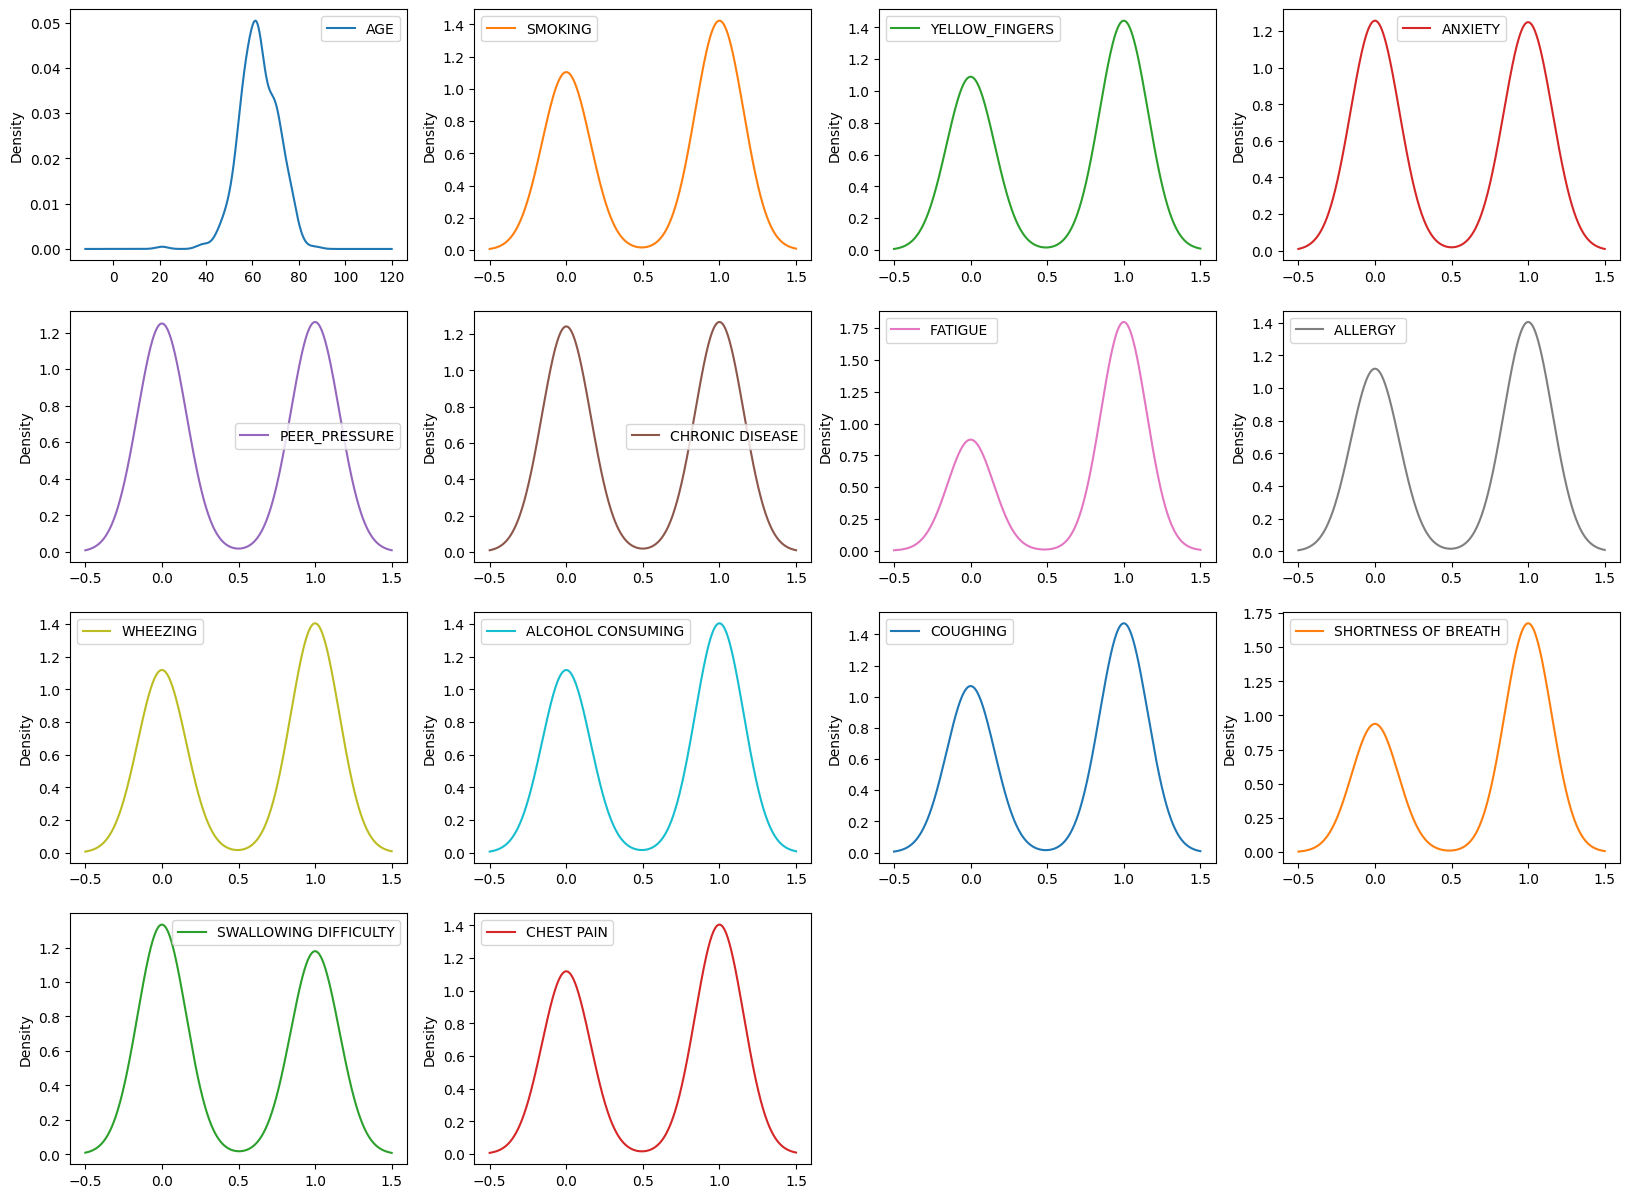

In [39]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (20,15))
plt.show()

Os gráficos de densidade nos confirmam o que relatamos anteriormente. 

Agora lançaremos mão do gráfico de calor para visualizarmos correlações entre os atributos

<Axes: >

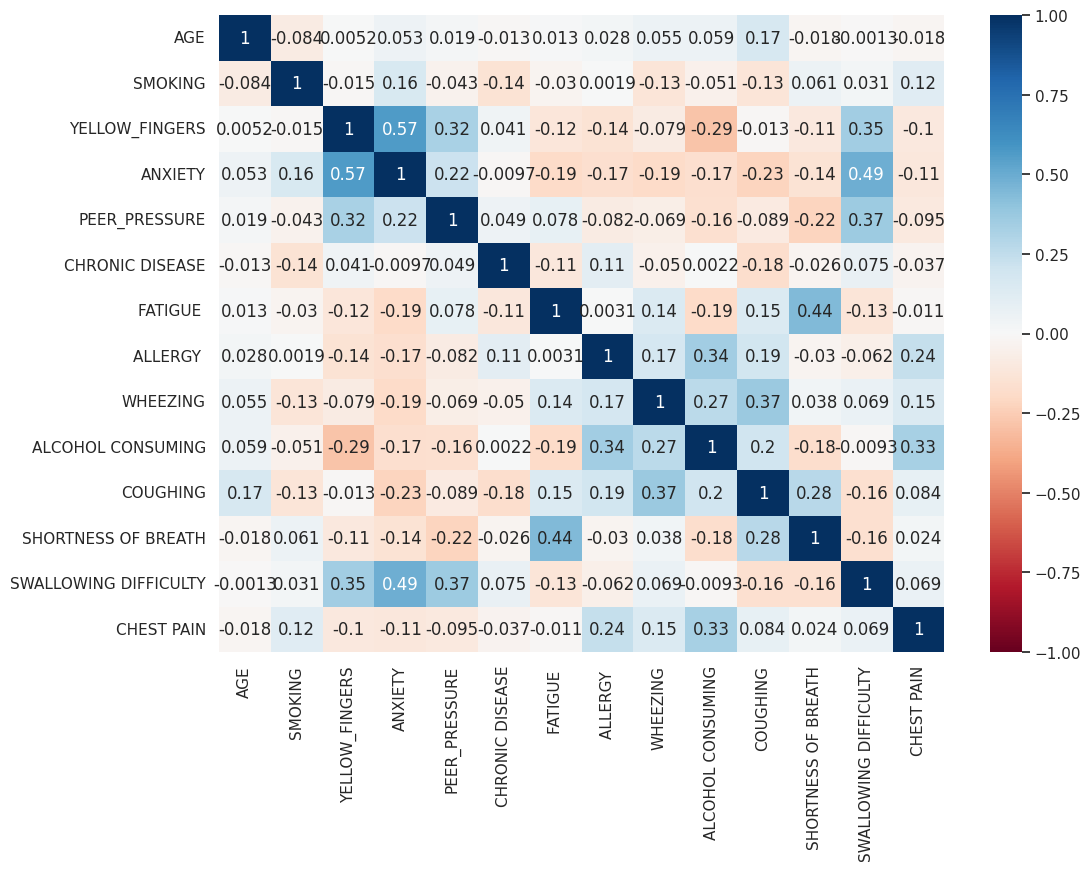

In [49]:
# gráfico de correlação
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


A correlação que mais se destaca é a de dedos amarelados com ansiedade, atingindo 0,57 de correlação. 

**5. Considerações Finais**

O dataset utilizado para o presente trabalho não possuía valores faltantes (missings), tampouco qualquer outro tipo de interferência que nos obrigasse a realizar substituições de NaN (fillna), excluir linhas (drop) ou outros problemas solucionáveis com códigos e comandos aprendidos ao longo do sprint 1. 

É relevante ressaltar que buscamos explorar a dataset seguindo o roteiro aprendido nas aulas, mas com a certeza de que poderíamos avançar significativamente na análise, plotando outros gráficos, seja comparando os resultados por gênero, por grupo que foi diagnosticado com a doença em relção ao que não foi, dentre outras possibilidades. 

Sendo assim, concluímos que o dataset utilizado facilitou consideravelmente o trabalho e que pudemos realizar uma análise inicial consistente, mostrando pontos relevantes a serem considerados.